# Installations

In [139]:
# May need to uncomment to install scikit-learn (sklearn)
#!pip install scikit-learn==0.23.1

In [140]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

# Load in Data

In [141]:
import csv
import re

# name of file
filename = "Poe_NotPoe_50words.csv"

# read in csv
pdf = pd.read_csv(filename, index_col=None)
pdf = pdf.drop([0,1])
pdf.rename(columns={'Unnamed: 0' : 'class'}, inplace=True)
pdf.reset_index(inplace=True, drop=True)

# create array of features
features = pdf.columns
features = features[1:]

# create dataframe of features (X) and classes (y)
X = pdf[features].values
y = pdf['class'].values
classes = []
num_elements = 0
for row in pdf['class']:
    classes.append(re.sub("_.+",'',row))
    num_elements += 1
    
y = pd.DataFrame(y)
y = y.values.tolist()
uniqueClasses = []
for each in classes:
    if each not in uniqueClasses:
        uniqueClasses.append(each)

# Familiarizing Ourselves With The Data

One important aspect of utilizing Machine Learning to solve a problem, is finding out if the problem can be solved in a more linear way with classical programming. In the case of the Poe dataset, we can ask ourselves can we just look at two words and always be able to clearly see that a given text is written by Poe or not? So, let's take a peek at our data in a graphed form, graphed below with a set feature on the x and y axis (which you are encouraged to switch and tinker around with!).

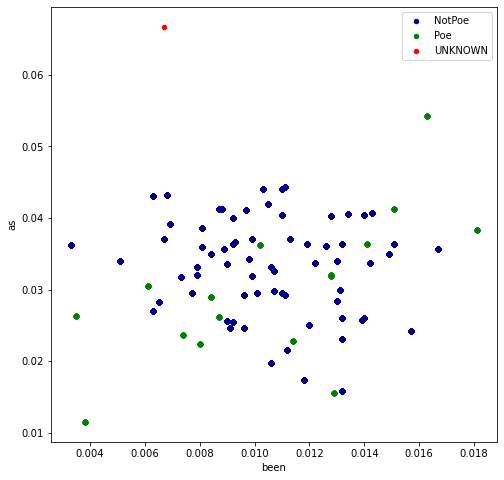

In [142]:
# resizing the figure - in (inches,inches)
figure_size = (8,8)

# setting the feature used on the x and y axis
feature_x = features[6]
feature_y = features[3]

# creating an array to force the color of the data points to correlate to their class (Poe, NotPoe, UNKNOWN)
colorArray = pd.DataFrame(y)
colorArray.loc[pdf['class'] == 'NotPoe', 'class'] = "DarkBlue"
colorArray.loc[pdf['class'] == 'Poe', 'class'] = "Green"
colorArray.loc[pdf['class'] == 'UNKNOWN', 'class'] = "Red"
colorArray = colorArray.drop(columns=[0])
colorArray = colorArray.values.tolist()

# sneaky way of making it so only unique labels are created in legend
label = ""
legendMade = []
ax = pdf[pdf['class'] == classes[0]][0:86].plot(figsize=figure_size, kind='scatter', x=feature_x, y=feature_y, color=colorArray[0], label=classes[0]);
legendMade.append(classes[0])
for eachClass in range(len(classes)-1):
    if classes[eachClass+1] not in legendMade:
        label = classes[eachClass+1]
        legendMade.append(classes[eachClass+1])
        pdf[pdf['class'] == classes[eachClass+1]][0:86].plot(figsize=figure_size,kind='scatter', x=feature_x, y=feature_y, color=colorArray[eachClass+1], ax=ax, label=label);
    else:
        label = ''
        pdf[pdf['class'] == classes[eachClass+1]][0:86].plot(figsize=figure_size,kind='scatter', x=feature_x, y=feature_y, color=colorArray[eachClass+1], ax=ax);

# show the plot
plt.show()

In the pursuit of familiarizing ourselves with our data, we now see that we are dealing with a complex issue with no clear classical solution. Let's go one step further and examine our features closer, and see what data types each feature is.

In [143]:
pdf.dtypes

class     object
all      float64
an       float64
and      float64
as       float64
at       float64
be       float64
been     float64
but      float64
by       float64
for      float64
from     float64
had      float64
i        float64
if       float64
in       float64
into     float64
is       float64
it       float64
its      float64
not      float64
now      float64
one      float64
own      float64
so       float64
some     float64
still    float64
such     float64
than     float64
that     float64
then     float64
there    float64
these    float64
to       float64
upon     float64
was      float64
were     float64
when     float64
which    float64
who      float64
with     float64
dtype: object

For a number of machine learning algorithms, it is essential to have numerical (int, float, double) features and class data. We see that we have only float based data in all of our features, BUT our classes are objects. This is not great for analysis, so we will now substitute numerical values for our class variables below.

In [144]:
# locating each variable value in pdf['class'] and assigning it a numerical value
pdf.loc[pdf['class'] == 'NotPoe', 'class'] = 1
pdf.loc[pdf['class'] == 'Poe', 'class'] = 2
# setting unknown to our "guess", so that analysis will give a "right"/"wrong" answer
pdf.loc[pdf['class'] == 'UNKNOWN', 'class'] = 2

# setting the data type of the classes to int
pdf['class'] = pdf['class'].astype('int')

# printing all rows in order to make sure changes were made correctly to all classes
with pd.option_context('display.max_rows', None, 'display.max_columns', 4):  # see all rows, only 4 columns
    print(pdf)

    class     all  ...     who    with
0       1  0.0144  ...  0.0095  0.0380
1       1  0.0195  ...  0.0122  0.0437
2       1  0.0171  ...  0.0099  0.0414
3       1  0.0187  ...  0.0181  0.0366
4       1  0.0168  ...  0.0162  0.0381
5       1  0.0094  ...  0.0109  0.0496
6       1  0.0141  ...  0.0109  0.0432
7       1  0.0135  ...  0.0130  0.0272
8       1  0.0143  ...  0.0121  0.0329
9       1  0.0115  ...  0.0141  0.0504
10      1  0.0175  ...  0.0121  0.0245
11      1  0.0154  ...  0.0127  0.0268
12      1  0.0194  ...  0.0166  0.0288
13      1  0.0092  ...  0.0059  0.0320
14      1  0.0083  ...  0.0062  0.0288
15      1  0.0078  ...  0.0086  0.0351
16      1  0.0082  ...  0.0053  0.0309
17      1  0.0087  ...  0.0188  0.0371
18      1  0.0088  ...  0.0163  0.0447
19      1  0.0066  ...  0.0150  0.0359
20      1  0.0115  ...  0.0171  0.0412
21      1  0.0193  ...  0.0134  0.0273
22      1  0.0192  ...  0.0105  0.0237
23      1  0.0133  ...  0.0164  0.0368
24      1  0.0118  ...  0

We are now at the point to start setting up our datasets to soon split them into train and test. For this, we will have X and y, X denoting the features of all rows and y denoting the class of each of the rows.

In [145]:
# creating X as an array of all features of all rows
feature_df = pdf[[features[0], features[1], features[2], features[3], features[4], features[5], features[6], features[7], features[8], features[9], features[10], features[11], features[12], features[13], features[14], features[15], features[16], features[17], features[18], features[19], features[20], features[21], features[22], features[23], features[24], features[25], features[26], features[27], features[28], features[29], features[30], features[31], features[32], features[33], features[34], features[35], features[36], features[37], features[38], features[39]]]
X = np.asarray(feature_df)

# creating y as an array of the class value of all rows
y = np.asarray(pdf['class'])

# printing to ensure that X and y are over the same number of rows (the first number must be the same for each shape)
print(X.shape)
print(y.shape)

(86, 40)
(86,)


# Splitting Data into Training and Testing sets

We will now split our data into training and testing sets. The training set will be used to train our model and the testing set will be used to test the accuracy of our model.

NOTE: For this example, we are overriding the standard of randomly selecting testing and training sets from our data to use only the last row of the data for a testing set and setting the entirity of the rest of our data to be the training set. In practice, test_size will most likely not be equal to 1, such that you are training AND training the model with a significant proportion of your data. The argument test_size is the proportion of your data used for the testing of the model, but when set equal to 1, it uses only one row for testing.

In [146]:

# for this example, we ensure that the training set is comprised of all but the last row of data (UNKNOWN row)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X[0:85], y[0:85], test_size=1, random_state=0)

# what happens if we underfit our model? What if we stratify our splits to maintain class proportions
#X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=.8, random_state=0)

# for this example, we override the randomly selected test sets so that we are testing with only the UNKNOWN row
X_testset = X[85:86]
y_testset = y[85:86]

# let's print out the shapes of the training set and the testing set
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (84, 40) (84,)
Test set: (1, 40) (1,)


Let us now create the Support Vector Machine and fit our model

In [147]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

SVC()

Just as in statistics, yhat is a prediction of what the testset is going to be. Here it will show an array of all predictions from our test set.

In [148]:
# create predictions on the testset
yhat = clf.predict(X_testset)

# print first few predictions
yhat

array([2])

Here is a function defined to construct a confusion matrix

In [149]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Results

The Confusion Matrix is a powerful analysis tool used to determine the accuracy of a model in detail. On the x-axis is the model's predicted label and on the y-axis is the true label, as determined by our data.

Thus, the top left and bottom right boxes show when the true label agrees with the predicted label (i.e. top left = "the text was predicted to have been written by Poe and the text was written by Poe" and bottom right = "the text was predicted to have not been written by Poe and the text was not written by Poe").

The top right and bottom left boxes display when the predicted label does NOT agree with the true label (i.e. top right = "the text was predicted to have not been written by Poe and the text was written by Poe" and bottom right = "the text was predicted to have been written by Poe and the text was not written by Poe"). These boxes have specific names designated to them, where the bottom left box is a "false positive" or "Type 1 Error" and the top right box is a "false negative" or "Type 2 Error". This is because the model falsely predicts a positive/Poe "value" in the bottom left box and falsely predicts negative/NotPoe "value" in the top right box.

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion matrix, without normalization
[[1 0]
 [0 0]]


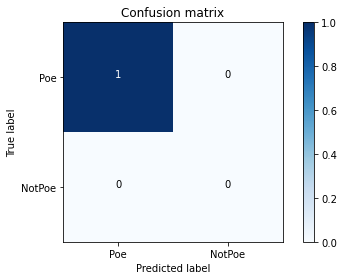

In [150]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=[2,1])
np.set_printoptions(precision=2)

print (classification_report(y_testset, yhat))

# Plot non-normalized confusion matrix
plt.figure()
x_labels = pdf['class'].tolist()
plt.xlabel("PREDICTED VALUE")
plt.ylabel("TRUE VALUE")

plot_confusion_matrix(cnf_matrix, classes=['Poe','NotPoe'],normalize= False,  title='Confusion matrix')

# Analysis

So how did our model work? Because we were working with a small testing set, our model is most likely overfit to our training data, but our model has predicted the author of the UNKNOWN text is Poe! Feel free to tinker around with the code, testing size, etc to see if you can prove authorship of other texts in the dataset!